### Step-0 Load data

In [9]:
import pandas as pd
BND_handler = pd.read_csv("../data/BND_data.csv")
SPY_handler = pd.read_csv("../data/SPY_data.csv")
TSLA_handler = pd.read_csv("../data/TSLA_data.csv")

In [10]:
BND_handler.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02 00:00:00+00:00,82.430000,82.690002,82.419998,82.650002,63.358753,2218800
1,2015-01-05 00:00:00+00:00,82.739998,82.919998,82.699997,82.889999,63.542717,5820100
2,2015-01-06 00:00:00+00:00,83.029999,83.379997,83.029999,83.129997,63.726730,3887600
3,2015-01-07 00:00:00+00:00,83.139999,83.279999,83.050003,83.180000,63.765049,2433400
4,2015-01-08 00:00:00+00:00,83.110001,83.110001,82.970001,83.050003,63.665428,1873400


In [11]:
SPY_handler.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02 00:00:00+00:00,206.380005,206.880005,204.179993,205.429993,173.173767,121465900
1,2015-01-05 00:00:00+00:00,204.169998,204.369995,201.350006,201.720001,170.046371,169632600
2,2015-01-06 00:00:00+00:00,202.089996,202.720001,198.860001,199.820007,168.444626,209151400
3,2015-01-07 00:00:00+00:00,201.419998,202.720001,200.880005,202.309998,170.543701,125346700
4,2015-01-08 00:00:00+00:00,204.009995,206.160004,203.990005,205.899994,173.569992,147217800


In [12]:
TSLA_handler.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02 00:00:00+00:00,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
1,2015-01-05 00:00:00+00:00,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2,2015-01-06 00:00:00+00:00,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
3,2015-01-07 00:00:00+00:00,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
4,2015-01-08 00:00:00+00:00,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


### Step-1 Data Cleaning and Understanding

In [13]:
print("BND Data Summary:\n", BND_handler.describe())
print("SPY Data Summary:\n", SPY_handler.describe())
print("TSLA Data Summary:\n", TSLA_handler.describe())

print("Missing Values in BND:\n", BND_handler.isnull().sum())
print("Missing Values in SPY:\n", SPY_handler.isnull().sum())
print("Missing Values in TSLA:\n", TSLA_handler.isnull().sum())

BND_handler = BND_handler.interpolate()  
SPY_handler = SPY_handler.interpolate()
TSLA_handler = TSLA_handler.interpolate()

BND Data Summary:
               Open         High          Low        Close    Adj Close  \
count  2014.000000  2014.000000  2014.000000  2014.000000  2014.000000   
mean     82.119682    82.225814    82.002612    82.115015    70.047950   
std       3.744186     3.726866     3.753981     3.740979     5.329671   
min      69.139999    69.580002    69.089996    69.379997    62.637558   
25%      80.447502    80.532499    80.244999    80.430000    65.995964   
50%      82.035000    82.139999    81.930000    82.029999    67.568302   
75%      84.570000    84.709999    84.465000    84.622498    75.097788   
max      89.550003    89.589996    89.440002    89.480003    79.812950   

             Volume  
count  2.014000e+03  
mean   3.705960e+06  
std    2.488405e+06  
min    0.000000e+00  
25%    1.843650e+06  
50%    2.905900e+06  
75%    5.016900e+06  
max    2.479270e+07  
SPY Data Summary:
               Open         High          Low        Close    Adj Close  \
count  2014.000000  201

C:\Users\USER\AppData\Local\Temp\ipykernel_12780\4073882988.py:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  BND_handler = BND_handler.interpolate()
C:\Users\USER\AppData\Local\Temp\ipykernel_12780\4073882988.py:10: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  SPY_handler = SPY_handler.interpolate()
C:\Users\USER\AppData\Local\Temp\ipykernel_12780\4073882988.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  TSLA_handler = TSLA_handler.interpolate()


### Step-2 Data Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

BND_handler['Close_Scaled'] = scaler.fit_transform(BND_handler[['Close']])
SPY_handler['Close_Scaled'] = scaler.fit_transform(SPY_handler[['Close']])
TSLA_handler['Close_Scaled'] = scaler.fit_transform(TSLA_handler[['Close']])

print("Scaled BND Close:\n", BND_handler[['Close', 'Close_Scaled']].head())
print("Scaled SPY Close:\n", SPY_handler[['Close', 'Close_Scaled']].head())
print("Scaled TSLA Close:\n", TSLA_handler[['Close', 'Close_Scaled']].head())


Scaled BND Close:
        Close  Close_Scaled
0  82.650002      0.660199
1  82.889999      0.672139
2  83.129997      0.684079
3  83.180000      0.686567
4  83.050003      0.680100
Scaled SPY Close:
         Close  Close_Scaled
0  205.429993      0.076547
1  201.720001      0.063965
2  199.820007      0.057521
3  202.309998      0.065966
4  205.899994      0.078141
Scaled TSLA Close:
        Close  Close_Scaled
0  14.620667      0.012594
1  14.006000      0.011059
2  14.085333      0.011257
3  14.063333      0.011202
4  14.041333      0.011147


### Step-3 Exploratory Data Analysis (EDA)

Exploratory Data Analysis: Visualizing Closing Prices

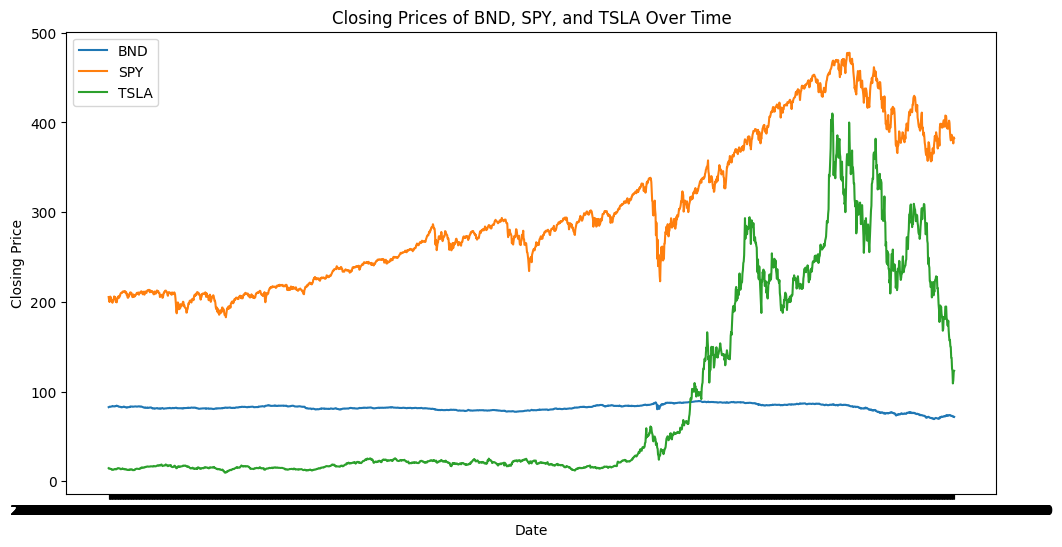

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(BND_handler['Date'], BND_handler['Close'], label='BND')
plt.plot(SPY_handler['Date'], SPY_handler['Close'], label='SPY')
plt.plot(TSLA_handler['Date'], TSLA_handler['Close'], label='TSLA')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Prices of BND, SPY, and TSLA Over Time")
plt.legend()
plt.show()
